# CO2 Emissions Prediction

## Introduction

## Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport

## Loading the Data

In [2]:
# Load the train.csv file into a DataFrame
data = pd.read_csv('CO2.csv')

In [3]:
#Viewing train the dataset
data.head()

Make       Model Vehicle Class  Engine Size(L)  Cylinders Transmission  \
0  ACURA         ILX       COMPACT             2.0          4          AS5   
1  ACURA         ILX       COMPACT             2.4          4           M6   
2  ACURA  ILX HYBRID       COMPACT             1.5          4          AV7   
3  ACURA     MDX 4WD   SUV - SMALL             3.5          6          AS6   
4  ACURA     RDX AWD   SUV - SMALL             3.5          6          AS6   

  Fuel Type  Fuel Consumption City (L/100 km)  \
0         Z                               9.9   
1         Z                              11.2   
2         Z                               6.0   
3         Z                              12.7   
4         Z                              12.1   

   Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                              6.7                               8.5   
1                              7.7                               9.6   
2                              5.8                               5.9   
3                              9.1                              11.1   
4                              8.7                              10.6   

   Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)  
0                           33                  196  
1                           29                  221  
2                           48                  136  
3                           25                  255  
4                           27                  244

### Insights
The CO2 emissions dataset contains columns: 
- Make	
- Model	
- Vehicle Class	
- Engine Size(L)	
- Cylinders	
- Transmission	
- Fuel Type	
- Fuel Consumption City (L/100 km)	
- Fuel Consumption Hwy (L/100 km)	
- Fuel Consumption Comb (L/100 km)	
- Fuel Consumption Comb (mpg)	
- CO2 Emissions(g/km

## Exploratory Data Analysis

In [12]:
# Generate the profile report
#profile = ProfileReport(data, title = 'Profile Report for CO2 Emissions', explorative = True)
#profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
# Count the number of duplicates
num_duplicates = data.duplicated().sum()
print('Number of duplicates:', num_duplicates)

# Remove the duplicates
data = data.drop_duplicates()

# Ver  ify the removal
num_duplicates_after_removal = data.duplicated().sum()
print('Number of duplicates after removal:', num_duplicates_after_removal)

Number of duplicates: 1103
Number of duplicates after removal: 0


In [5]:
data.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

### Insights
The CO2 car emissions dataset contained 1103 duplicates these could be incorrect entries or redundant columns and after removing these columns we have no duplicates.

## Analysis

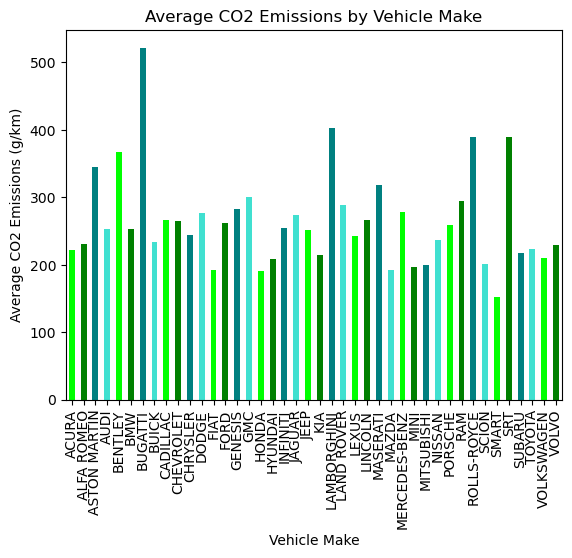

In [5]:
# Bar Plot: Average CO2 emissions by vehicle make
make_avg_emissions = data.groupby('Make')['CO2 Emissions(g/km)'].mean()
make_avg_emissions.plot(kind='bar', color=['lime', 'green', 'teal', 'turquoise'])
plt.xlabel('Vehicle Make')
plt.ylabel('Average CO2 Emissions (g/km)')
plt.title('Average CO2 Emissions by Vehicle Make')
plt.show()

### Insights
##### Sport Cars Emissions:
- Sports cars, on average, exhibit higher CO2 emissions compared to other makes. This suggests that the performance and power associated with sports cars often come at the cost of higher carbon emissions.
##### Luxury Cars and High Emissions:
- Luxury cars, such as Bugatti, Lamborghini, SRT, and Rolls Royce, stand out as having some of the highest CO2 emissions. This aligns with the expectation that larger and more powerful engines, typical in luxury vehicles, contribute to increased carbon emissions.
##### Bugatti Emission Pinnacle:
- The Bugatti emerges as the highest emitter in the dataset, emitting a substantial 500g of CO2. This underscores the environmental impact associated with high-performance luxury vehicles.
##### Variability in Emissions:
- There is significant variability among different car makes regarding CO2 emissions. This indicates that the choice of make plays a crucial role in determining the environmental impact of a vehicle.
##### Eco-Friendly Options:
- The Smart car stands out as the least emitter, followed by Fiat, Honda, Mazda, and Scion. This suggests that certain car manufacturers prioritize and succeed in producing more eco-friendly and fuel-efficient vehicles.

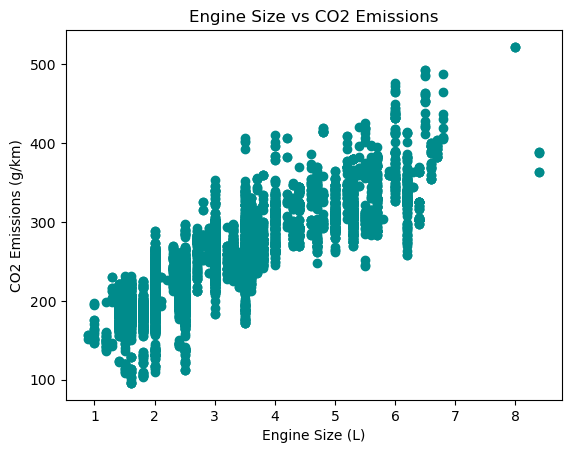

In [21]:
# Scatter Plot: Engine size vs CO2 emissions
plt.scatter(data['Engine Size(L)'], data['CO2 Emissions(g/km)'], color='darkcyan')
plt.xlabel('Engine Size (L)')
plt.ylabel('CO2 Emissions (g/km)')
plt.title('Engine Size vs CO2 Emissions')
plt.show()

### Insights
##### Linear Relationship Between Engine Size and CO2 Emissions:
- The scatter plot reveals a clear and linear relationship between engine size and CO2 emissions. As the engine size increases, there is a corresponding increase in CO2 emissions. This suggests that engine size is a significant factor influencing the environmental impact of a vehicle.

##### Incremental Increase in Emissions with Engine Size:
- The observed pattern of CO2 emissions increasing incrementally with engine size provides valuable information. This implies that even a relatively small increase in engine size can lead to a notable rise in emissions, reinforcing the sensitivity of emissions to engine size.

##### Engine Size Categories and Emission Ranges:
- The scatter plot categorizes engine sizes, showing distinct emission ranges for each category. Smaller engine sizes (1L) tend to have lower CO2 emissions (100-200g), while larger engine sizes (7-8L and above) are associated with higher emissions, exceeding 500g. This categorization highlights the importance of considering engine size when assessing the environmental impact of a vehicle.

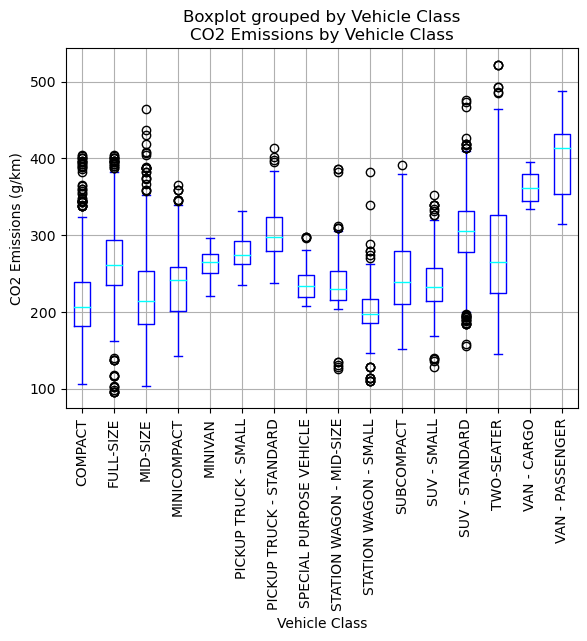

In [23]:
# Box Plot: CO2 emissions by vehicle class
data.boxplot(column='CO2 Emissions(g/km)', by='Vehicle Class', color=dict(boxes='blue', whiskers='blue', medians='aqua', caps='blue'))
plt.xlabel('Vehicle Class')
plt.ylabel('CO2 Emissions (g/km)')
plt.title('CO2 Emissions by Vehicle Class')
plt.xticks(rotation=90)
plt.show()

### Insights
##### Variability Across Vehicle Classes:
- The boxplot reveals significant variability in CO2 emissions across different vehicle classes. Each class has a distinct distribution of emissions, indicating that the type of vehicle plays a crucial role in determining its environmental impact.

##### Compact and Full-Size Vehicles:
- Compact and full-size vehicles show comparable mean CO2 emissions, with means slightly over 200g and 250g, respectively. Both classes exhibit outliers reaching up to 400g, suggesting that within these categories, there are models with higher emissions.

##### Mid-Size Vehicles with High Variability:
- The mid-size vehicle class stands out with a mean CO2 emission of a little over 220g. It has considerable variability, including outliers approaching 500g. This class includes models with both relatively low and exceptionally high emissions.

##### Minivan, Pick-Up Truck, and Cargo Van:
- The minivan, pick-up truck, and cargo van classes show no outliers in CO2 emissions. The minivan and pick-up truck classes have mean values above 300g, while the cargo van has a mean of 360g. These classes demonstrate relatively consistent emissions within the interquartile range.

##### Passenger Van with High Mean Emissions:
- The van-passenger class has the highest mean CO2 emission, exceeding 400g. This class also shows a wider interquartile range, indicating significant variability in emissions among passenger vans.

##### Station Wagon-Small with Lower Mean Emissions:
- The station wagon-small class exhibits the lowest mean CO2 emission, with a value of 200g. This suggests that smaller and more compact vehicles within this class tend to have lower environmental impact.

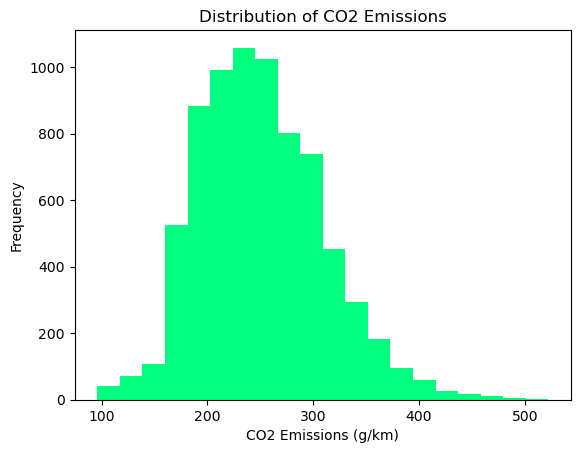

In [24]:
# Histogram: Distribution of CO2 emissions
data['CO2 Emissions(g/km)'].plot(kind='hist', bins=20, color='springgreen')
plt.xlabel('CO2 Emissions (g/km)')
plt.ylabel('Frequency')
plt.title('Distribution of CO2 Emissions')
plt.show()

### Insights
##### Skewed Distribution:
- The histogram illustrates a skewed distribution of CO2 emissions, with a peak frequency between 200g and 300g. This suggests that a significant portion of the vehicles in the dataset falls within this emission range.

##### High Emission Tail:
- The distribution extends to higher emission values, reaching peaks between 600g and 1000g. This indicates the presence of vehicles with comparatively high CO2 emissions. The tail of the distribution suggests that while many vehicles have moderate emissions, there are outliers with significantly higher pollution levels.

##### Decrease in Frequency Above 300g:
- Beyond 300g, the frequency of vehicles decreases, indicating that fewer vehicles in the dataset have emissions above this threshold. The decline in frequency suggests a decreasing number of high-emission vehicles.

##### Low to Moderate Emissions:
- Between 100g and 300g, the histogram shows a relatively consistent frequency, suggesting that there is a diverse range of vehicles with low to moderate emissions. This range may include smaller cars, hybrids, and fuel-efficient models.

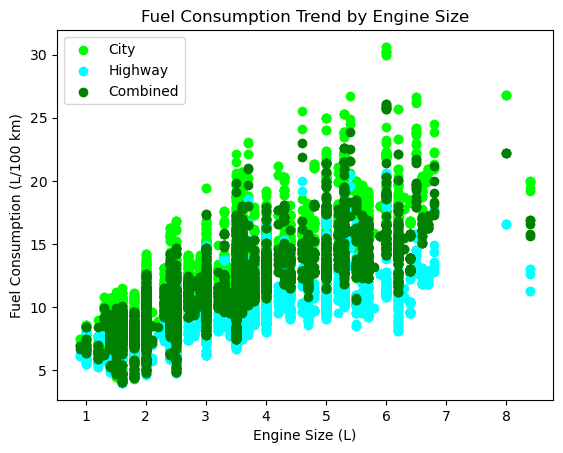

In [26]:
plt.scatter(data['Engine Size(L)'], data['Fuel Consumption City (L/100 km)'], label='City', color='lime')
plt.scatter(data['Engine Size(L)'], data['Fuel Consumption Hwy (L/100 km)'], label='Highway', color='cyan')
plt.scatter(data['Engine Size(L)'], data['Fuel Consumption Comb (L/100 km)'], label='Combined', color='green')

plt.xlabel('Engine Size (L)')
plt.ylabel('Fuel Consumption (L/100 km)')
plt.title('Fuel Consumption Trend by Engine Size')
plt.legend()
plt.show()

### Insights
##### Linear Relationship Between Engine Size and Fuel Consumption:
- The scatter plot demonstrates a clear linear relationship between engine size and fuel consumption across city, highway, and combined metrics. As engine size increases, there is a proportional increase in fuel consumption, suggesting that larger engines generally consume more fuel.

##### Fuel Consumption Trend Across Engine Sizes:
The insights reveal distinct trends in fuel consumption based on engine size categories:
- For engine sizes between 1L and 2L, fuel consumption ranges from 1 to 13 liters.
- In the 2.5L to 3.5L range, fuel consumption increases to a range of 5L to 20L.
- For engine sizes between 3.5L and 5L, fuel consumption extends to a range of 7 to 25 liters.
- Beyond 5L up to 8L, fuel consumption can go up to 30L.

##### Variation in Fuel Consumption Across Metrics:
- The scatter plot differentiates between city, highway, and combined fuel consumption. Highway fuel consumption tends to be the lowest, followed by combined, with city fuel consumption being the highest. This variation highlights the impact of driving conditions on fuel efficiency, with city driving generally requiring more fuel compared to highway driving.

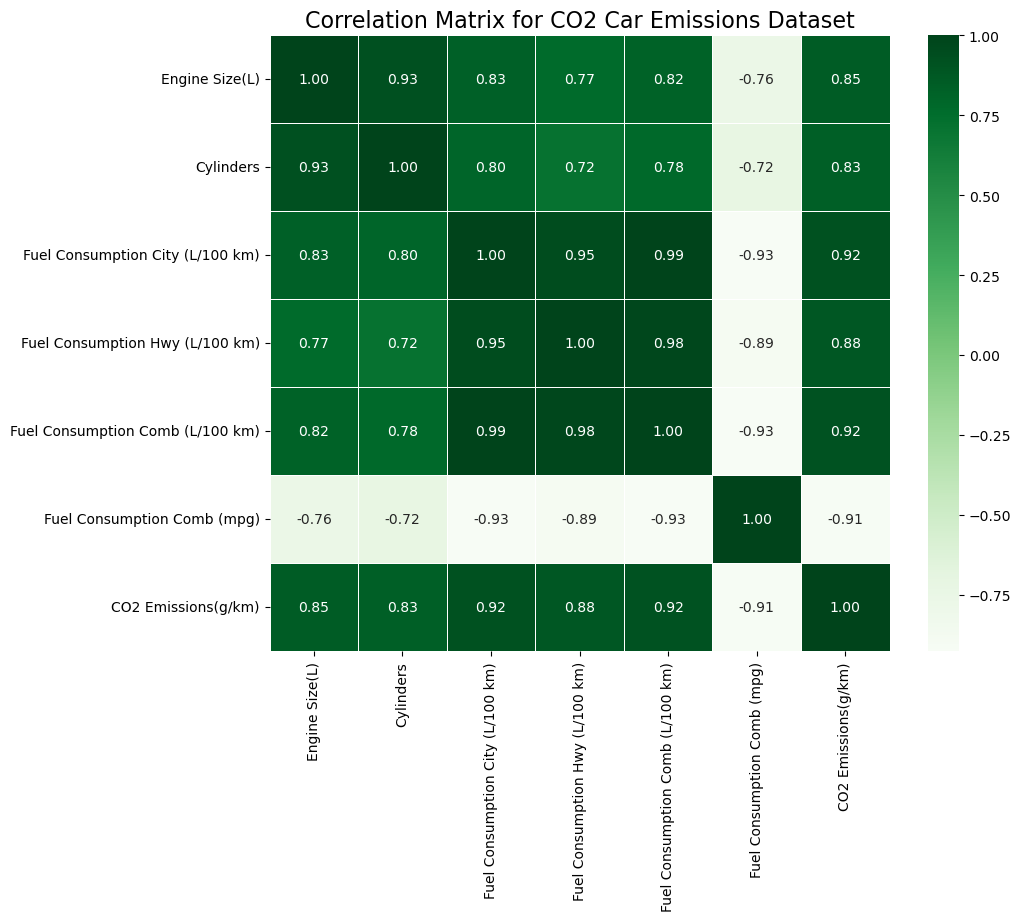

In [5]:
# Selecting relevant columns for correlation analysis
columns_of_interest = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)',
                         'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
                        'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)']

# Creating a subset of the DataFrame with selected columns
subset_df = data[columns_of_interest]

# Calculate the correlation matrix
correlation_matrix = subset_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap using Seaborn with a green color palette
sns.heatmap(correlation_matrix, annot=True, cmap='Greens', fmt=".2f", linewidths=.5)

# Set the title of the plot with increased fontsize
plt.title('Correlation Matrix for CO2 Car Emissions Dataset', fontsize=16)

# Show the plot
plt.show()

### Insights
##### High Positive Correlations:
- Variables such as engine size, cylinders, and CO2 emissions exhibit high positive correlations. For instance:
- Engine size and cylinders have a strong positive correlation of 0.93.
- CO2 emissions have a high positive correlation with engine size (0.85), cylinders (0.83), fuel consumption (city) (0.92), fuel consumption (highway) (0.88), and fuel consumption (combined) (0.92).
- Engine size and fuel consumption (city) show a strong positive correlation of 0.83.
- Fuel consumption (combined) and engine size have a strong positive correlation of 0.82.

##### Negative Correlation with Fuel Consumption (Combined - mpg):
- The variable fuel consumption combined (mpg) demonstrates negative correlations with various other variables:
- Negative correlation with engine size (-0.76) suggests that as engine size increases, fuel efficiency (measured in miles per gallon) tends to decrease.
- Negative correlation with cylinders (-0.72) indicates a similar relationship, where higher cylinder count is associated with lower fuel efficiency.
- Strong negative correlations with fuel consumption (city) (-0.93), fuel consumption (highway) (-0.89), fuel consumption (combined) (-0.93), and CO2 emissions (-0.91) suggest that higher fuel efficiency correlates with lower carbon emissions and fuel consumption in different driving conditions

## Feature Creation

Feature scaling is the process of normalising the range of features in a dataset. Real-world datasets often contain features that are varying in degrees of magnitude, range and units. Therefore, in order for machine learning models to interpret these features on the same scale, we need to perform feature scaling.

## Model Training


Training Linear Regression...
Best Parameters: {}
Best Negative Mean Squared Error: -1.3942852384226707e+28
Mean Squared Error: 8.918281829218935e+27
R^2 Score: -2.471313246636601e+24


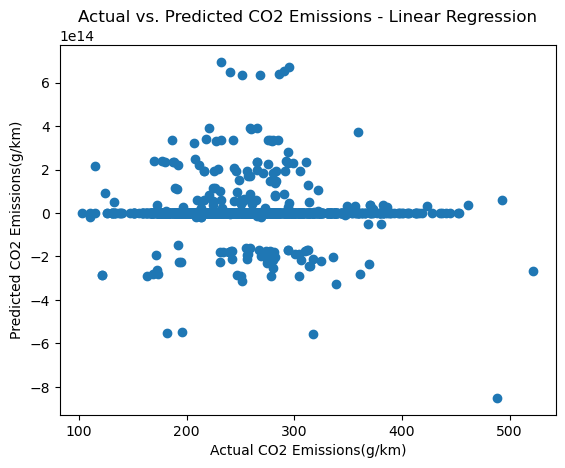


Training Decision Tree...
Best Parameters: {'model__max_depth': 10, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2}
Best Negative Mean Squared Error: -18.798759258092264
Mean Squared Error: 24.77049702113583
R^2 Score: 0.9931359359811276


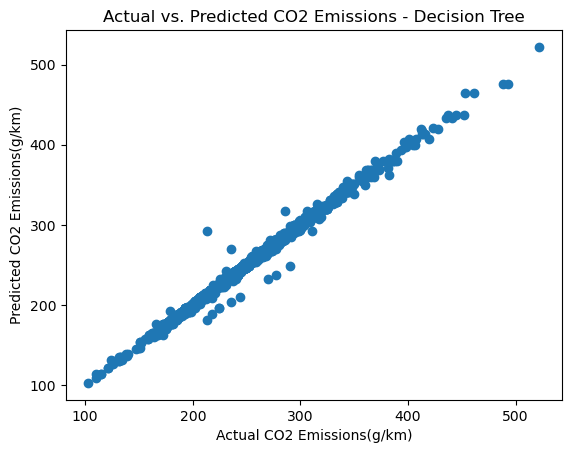


Training Random Forest...


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline  
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the specified columns
columns_to_include = ['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
                       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
                       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
                       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)']

# Select the relevant columns from your DataFrame
data = data[columns_to_include]

# Drop rows with missing values for simplicity
data = data.dropna()

# Assume 'CO2 Emissions(g/km)' is the target variable
X = data.drop('CO2 Emissions(g/km)', axis=1)
y = data['CO2 Emissions(g/km)']

# Convert categorical variables to dummy/indicator variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Define models and their parameter grids for hyperparameter tuning
models = {
    'Linear Regression': {
        'model': LinearRegression(),
        'params': {}
    },
    'Decision Tree': {
        'model': DecisionTreeRegressor(),
        'params': {
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    'Random Forest': {
        'model': RandomForestRegressor(),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    'Gradient Boosting': {
        'model': GradientBoostingRegressor(),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7]
        }
    },
    'K-Nearest Neighbors': {
        'model': KNeighborsRegressor(),
        'params': {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance'],
            'p': [1, 2]
        }
    }
}

# ...

# Iterate through models
for model_name, model_info in models.items():
    print(f"\nTraining {model_name}...")

    # Create a pipeline with a scaler (standardization) and the model
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model_info['model'])
    ])

    # Update the parameter grid for grid search
    param_grid = {
        f'model__{param}': values for param, values in model_info['params'].items()
    }

    # Use GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Print the best parameters and best negative mean squared error
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"Best Negative Mean Squared Error: {grid_search.best_score_}")

    # Make predictions on the test set
    y_pred = grid_search.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'Mean Squared Error: {mse}')
    print(f'R^2 Score: {r2}')

    # Visualize actual vs. predicted values
    plt.scatter(y_test, y_pred)
    plt.xlabel('Actual CO2 Emissions(g/km)')
    plt.ylabel('Predicted CO2 Emissions(g/km)')
    plt.title(f'Actual vs. Predicted CO2 Emissions - {model_name}')
    plt.show()


### Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline  
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the specified columns
columns_to_include = ['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
                       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
                       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
                       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)']

# Select the relevant columns from your DataFrame
data = data[columns_to_include]

# Drop rows with missing values for simplicity
data = data.dropna()

# Assume 'CO2 Emissions(g/km)' is the target variable
X = data.drop('CO2 Emissions(g/km)', axis=1)
y = data['CO2 Emissions(g/km)']

# Define categorical columns for one-hot encoding
categorical_cols = ['Make', 'Model', 'Vehicle Class', 'Transmission']

# Create a column transformer for one-hot encoding and scaling
preprocessor = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(drop_first=True), categorical_cols),
        ('scaler', StandardScaler(), X.columns.difference(categorical_cols))
    ],
    remainder='passthrough'
)

# Apply the transformations
X_preprocessed = preprocessor.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Define models and their parameter grids for hyperparameter tuning
models = {
    'Linear Regression': {
        'model': LinearRegression(),
        'params': {}
    },
    'Decision Tree': {
        'model': DecisionTreeRegressor(),
        'params': {
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    'Random Forest': {
        'model': RandomForestRegressor(),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    'Gradient Boosting': {
        'model': GradientBoostingRegressor(),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7]
        }
    },
    'K-Nearest Neighbors': {
        'model': KNeighborsRegressor(),
        'params': {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance'],
            'p': [1, 2]
        }
    }
}

# ...

# Iterate through models
for model_name, model_info in models.items():
    print(f"\nPerforming hyperparameter tuning for {model_name}...")

    # Create a pipeline with the preprocessor, scaler, and the model
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model_info['model'])
    ])

    # Update the parameter grid for grid search
    param_grid = {
        f'model__{param}': values for param, values in model_info['params'].items()
    }

    # Use GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Print the best parameters and best negative mean squared error
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"Best Negative Mean Squared Error: {grid_search.best_score_}")

    # Make predictions on the test set
    y_pred = grid_search.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'Mean Squared Error: {mse}')
    print(f'R^2 Score: {r2}')

    # Visualize actual vs. predicted values
    plt.scatter(y_test, y_pred)
    plt.xlabel('Actual CO2 Emissions(g/km)')
    plt.ylabel('Predicted CO2 Emissions(g/km)')
    plt.title(f'Actual vs. Predicted CO2 Emissions - {model_name}')
    plt.show()


## Model Evaluation


## Conclusion